# <font color='blue'>Uma análise preditiva do mercado imobiliário com Python</font>


### Como saber quando comprar uma casa? Ou qual melhor custo-benefício para comprar um imóvel? 
### Nosso modelo pode responder, mas para isso é preciso implementá-lo. A linguagem Python é referência na ciência de dados. Portanto, apresentaremos seu ecossistema para uma análise preditiva desde seus frameworks, além de uma visão das principais bibliotecas.


## Prirâmade DIKW

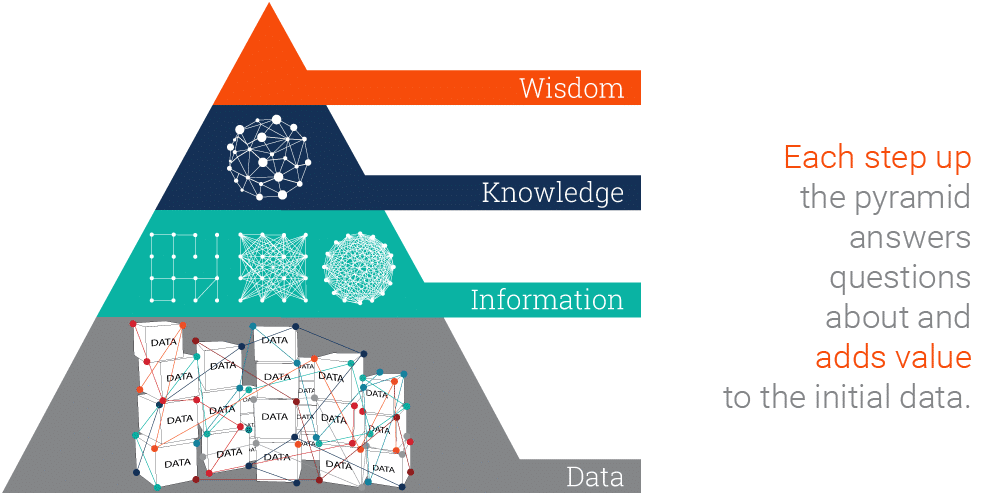

In [1]:
from IPython.display import Image
Image('DIKW-Pyramid.png')

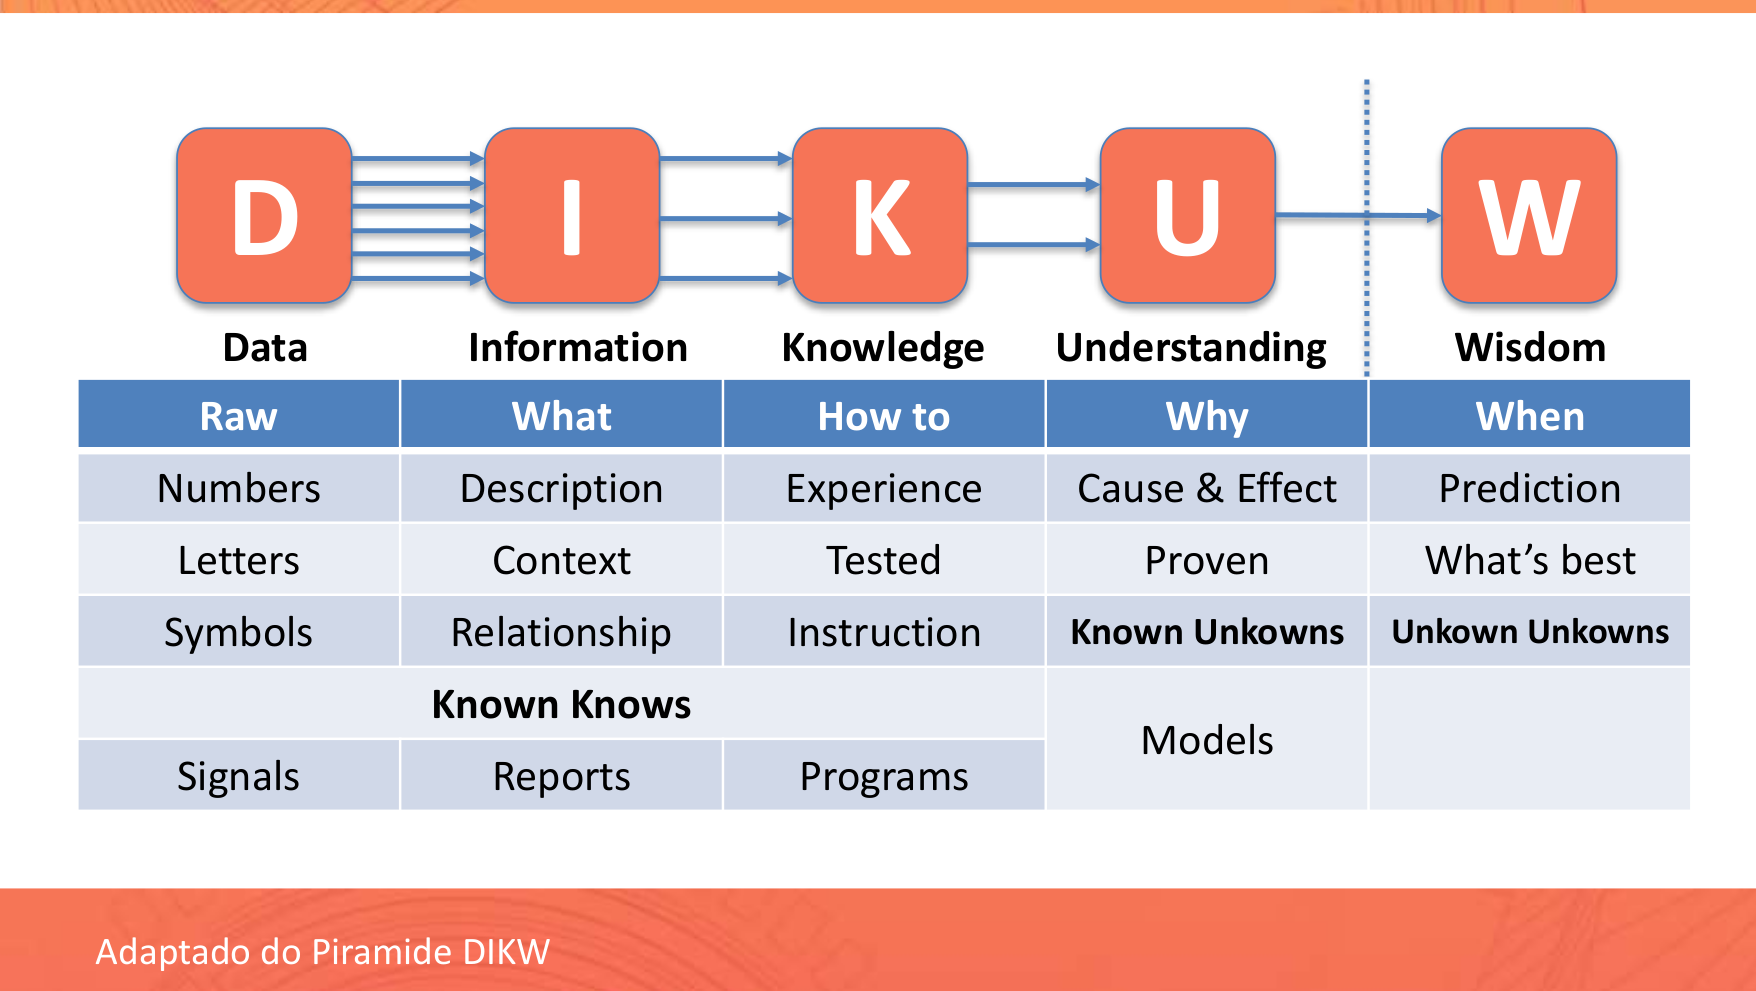

In [2]:
Image('DIKW-Process.png')

## Processo de Análise de Dados

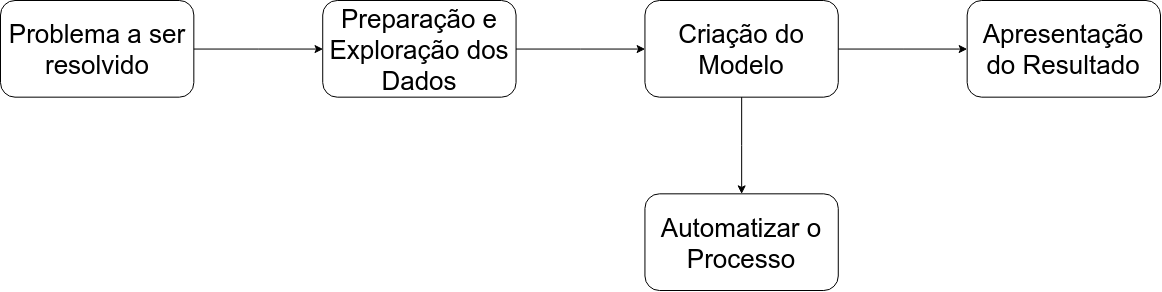

In [3]:
Image('ProcessoAnaliseDados.png')

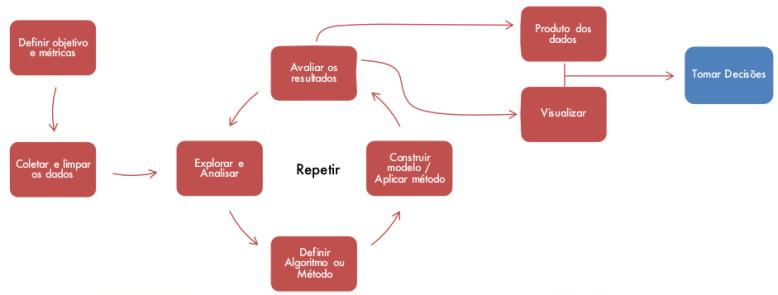

In [4]:
Image('flow-dc.png')

## Aprendizado de Máquina (MACHINE LEARNING - ML)

https://pt.wikipedia.org/wiki/Aprendizado_de_m%C3%A1quina

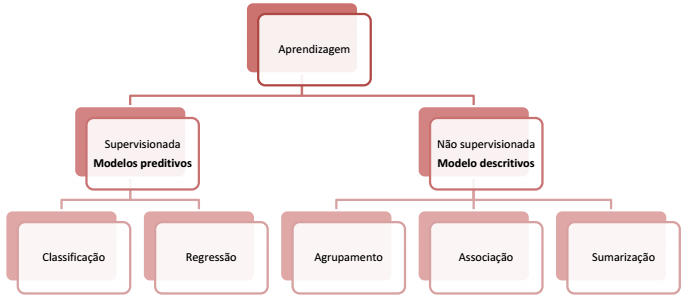

In [5]:
Image('aprendizado-maquina.png')

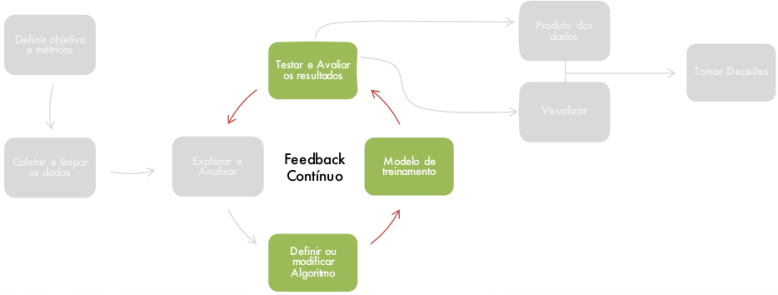

In [6]:
Image('flow-ml.png')

## Python para Data Science
## Anaconda (open data science stack - pydata stack):
### Begin: https://pydata.org/index.html
### Fundamentais:
**Jupter Notbook**: IDE interativa "web"

**Numpy**: Computação matemática
    - Operações com array e matrizes
    - Objetos mais otimizados

**Pandas**: Manipulação de dados (dataset) - Data Munging/Wrangling
    - Limpeza e transformação dos dados brutos (70% - 80%)
    - Dados estruturados
    - Slice and dice - cubo olap
    - Séries temporais e Dataframe

**Matplotlib**: Visualização dos dados e gráficos

### Avançados:

**SciPy**: Computação científica
      - Algebra linear
      - Matrizes esparsas
      - Números randômicos
      - Estimativa de densidade
      - Otimização
      - Processamento de sinais e imagens
      - SciPy + Numpy + Matplotlib = Matlab (proprietária)

**Scikit-Learn**: Machine Learning
        (Modelagem estatística - classificação, regressão, clustering e redução da dimensionalidade.)
      - Aprendizagem Supervisionada** (Treinamento sobre um dataset)
              - Classificação
              - Regressão
      - Aprendizagem Não Supervisionada** (Não precisa de treinamento)
              - Clusterização
              - Redução da dimensionalidade
**TensorFlow**: Deep Learning

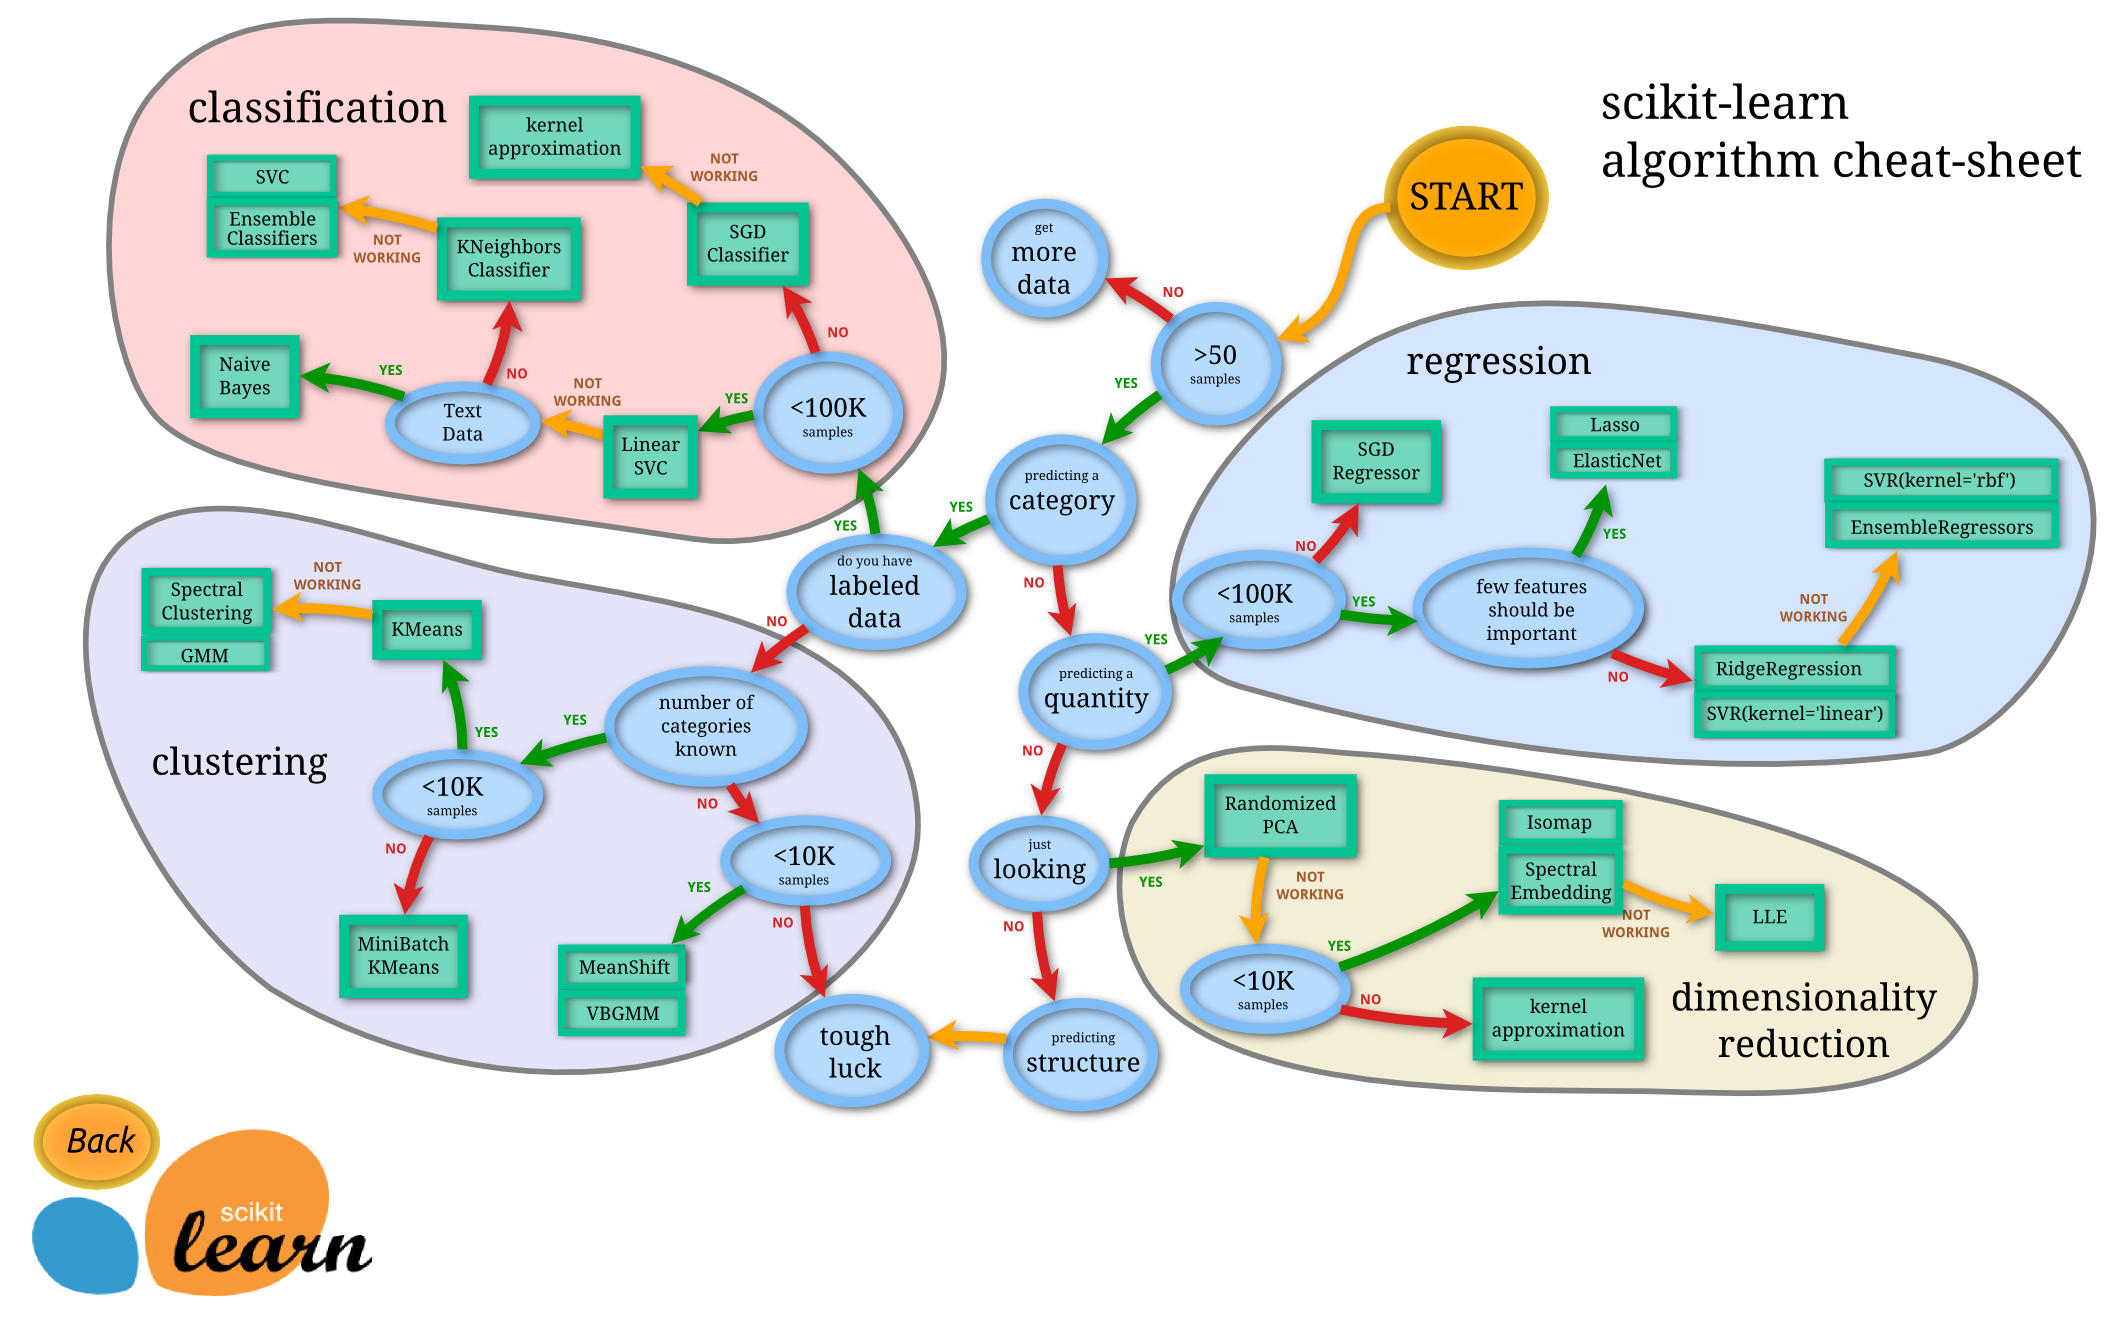

In [7]:
from IPython.display import Image
Image('ml_map.png')

## O que o modelo (Regressão Linear) aprende

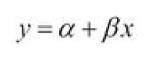

In [8]:
from IPython.display import Image
Image('linear.png')

- Y -> Variável target
- X -> Variável preditora
- Alfa é coeficiente linear
- Beta é o coeficiente angular (referente a cada variável preditora)

#### TIPS:
- Relação positiva nem sempre quer dizer uma relação de "Causa e efeito"
- Qual variável preditora usar?
        - Depende da experiência com a regra de negócio (fase da análise exploratória)

# Dataset Boston Housing

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

In [10]:
# O dataset boston já está disponível no scikit-learn. Precisamos apenas carregá-lo.

from sklearn.datasets import load_boston
boston = load_boston()

In [11]:
# Verificando o tipo da variável boston

type(boston)

sklearn.utils.Bunch

In [12]:
# Visualizando o shape do dataset - 503 linhas e 13 colunas (Dataframe, tabela, planilha, etc...)

boston.data.shape

(506, 13)

In [13]:
# Descrição do Dataset - 13 atributos (variáveis preditoras) + 1 variável target

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

- CRIM:    taxa de criminalidade per capita por cidade
- ZN:      proporção de terrenos residenciais destinados a lotes com mais de 25.000 pés quadrados
- INDUS:   proporção de acres de negócios não varejistas por cidade
- CHAS:    Variável dummy de Charles River (= 1 se o limite do setor é rio; 0 caso contrário)
- NOX:     concentração de óxidos nítricos (partes por 10 milhões)
- RM:      número médio de quartos por habitação
- AGE:     proporção de unidades ocupadas pelo proprietário construídas antes de 1940
- DIS:     distâncias ponderadas para cinco centros de emprego de Boston
- RAD:     índice de acessibilidade a rodovias radiais
- TAX:     taxa de imposto predial de valor integral por US10.000
- PTRATIO: relação aluno-professor por cidade
- B:       1000 (Bk - 0,63) ^ 2 onde Bk é a proporção de negros por cidade
- LSTAT:   % menor estado da população
- ....
- MEDV:    Valor mediano de residências ocupadas pelo proprietário em US1000

In [14]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [15]:
# Convertendo o dataset em um DataFrame pandas

df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
# Convertendo o título das colunas

df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
boston# boston.target é uma array com o preço das casas 

boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [18]:
# Adicionando o preço da casa ao DataFrame

df['PRICE'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Prevendo o preço das casas em Boston

### Y - variável target / dependente (preço das casas em Boston)
### X - variáveis preditoras / independentes ou explanatórias (todas as outras caracterísricas da casa)

In [19]:
# Não queremos o preço da casa como variável dependente 

X = df.drop('PRICE', axis = 1)

In [20]:
# Definindo Y

Y = df.PRICE

In [21]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

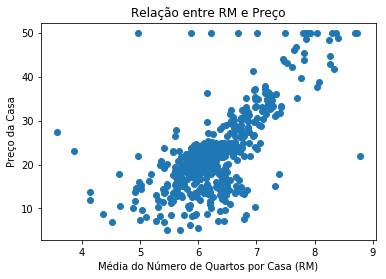

In [23]:
plt.scatter(df.RM, Y)
plt.xlabel("Média do Número de Quartos por Casa (RM)")
plt.ylabel("Preço da Casa")
plt.title("Relação entre RM e Preço")
plt.show()

In [24]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [25]:
# Importando o módulo de regressão linear 
# Criando o objeto de regressão linear

from sklearn.linear_model import LinearRegression

regr = LinearRegression()
type(regr)

sklearn.linear_model.base.LinearRegression

In [26]:
# Treinando o modelo com as 13 variaveis preditoras

regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
# Coeficientes - modelo de regressão linear multipla

print("Coeficiente: ", regr.intercept_)
print("Número de Coeficiente: ", len(regr.coef_))

Coeficiente:  36.45948838509015
Número de Coeficiente:  13


In [28]:
# Prevendo o preço da casa

regr.predict(X)

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

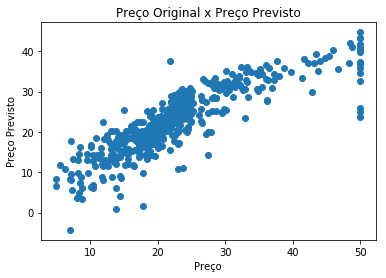

In [31]:
# Comparando preços originais x preços previstos
plt.scatter(df.PRICE, regr.predict(X))
plt.xlabel("Preço")
plt.ylabel("Preço Previsto")
plt.title("Preço Original x Preço Previsto")
plt.show()

In [34]:
#Mean# Vamos calcular o MSE (Mean Squared Error)

mse1 = np.mean((df.PRICE - regr.predict(X)) ** 2)
print(mse1)

21.89483118172922


In [35]:
# Aplicando regressõa linear para apenas uma variável e calculando o MSE - aumentou o MSE

regr = LinearRegression()
regr.fit(X[['RM']], df.PRICE)

mse2 = np.mean((df.PRICE - regr.predict(X[['RM']])) ** 2)
print(mse2)

43.60055177116958


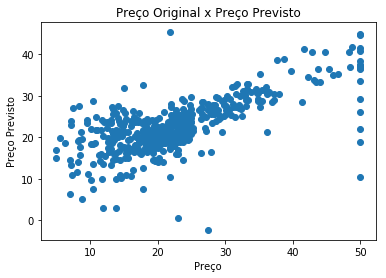

In [36]:
# Comparando preços originais x preços previstos
plt.scatter(df.PRICE, regr.predict(X[['RM']]))
plt.xlabel("Preço")
plt.ylabel("Preço Previsto")
plt.title("Preço Original x Preço Previsto")
plt.show()

In [37]:
# Aplicando regressõa linear para apenas uma variável e calculando o MSE - aumentou o MSE

regr = LinearRegression()
regr.fit(X[['RM','CRIM']], df.PRICE)
mse2 = np.mean((df.PRICE - regr.predict(X[['RM','CRIM']])) ** 2)
print(mse2)

38.66760324503635


### O MSE aumentou, indicando que uma única característica não é um bom predictor para o preço das casas.

### Na prática, não vamos implementar regressão linear em todo o dataset. Iremos dividir o dataset em datasets de treino e de teste. Assim, treinamos o modelo nos dados de treino e depois verifica como o modelo se comporta nos seus dados de teste.

### Vamos dividir os datasets randomicamente. O Scikit-Learn provê uma função chamada train_test_split() para isso.

In [40]:
from sklearn.model_selection import train_test_split

In [60]:
# Dividindo X e Y em dados de treino e de teste (30% do dataset para teste e 70% para treino)

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, df.PRICE, test_size = 0.8, random_state = 5)

In [61]:
# Imprimindo o shape dos datasets

print(X_treino.shape, X_teste.shape, Y_treino.shape, Y_teste.shape)

(101, 13) (405, 13) (101,) (405,)


In [62]:
# Construindo um modelo de regressão

regr = LinearRegression()

In [63]:
# Treinando o modelo

regr.fit(X_treino, Y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
# Definindo os dados de predição de treino e teste

pred_treino = regr.predict(X_treino)
pred_teste = regr.predict(X_teste)

mse_treino = np.mean((Y_treino - pred_treino) ** 2)

print('mse treino', mse_treino)

mse treino 18.721132955182796


In [ ]:
# Comparando preços originais x preços previstos

plt.scatter(regr.predict(X_treino), regr.predict(X_treino) - Y_treino, c = 'b', s = 40, alpha = 0.5)
plt.scatter(regr.predict(X_teste), regr.predict(X_teste) - Y_teste, c = 'g', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 0, xmax = 50)
plt.ylabel("Resíduo")
plt.title("Residual Plot - Treino(Azul), Teste(Verde)")
plt.show()

### Até então fizemos predição só com os dados do dataset, como fazer com uma nova informação? 

In [65]:
# Fazendo predição de um novo input

from pandas.compat import OrderedDict

d = OrderedDict()
d['CRIM'] = [0.00632]
d['ZN'] = [18.0]
d['INDUS'] = [2.31]
d['CHAS'] = [0.0]
d['NOX'] = [0.538]
d['RM'] = [15]
d['AGE'] = [65.0]
d['DIS'] = [4.08]
d['RAD'] = [1.0]
d['TAX'] = [296.0]
d['PTRATIO'] = [15.3]
d['B'] = [396.9]
d['LSTAT'] = [4.98]

new_df = pd.DataFrame(d)
new_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,15,65.0,4.08,1.0,296.0,15.3,396.9,4.98


In [66]:
regr.predict([new_df][0])

array([61.43542228])